<a href="https://colab.research.google.com/github/Rarag1/trainings/blob/main/Rarag1/trainings/tree/main/Statistics/HW9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### 1.Даны значения величины заработной платы заемщиков банка (zp) и значения их поведенческого кредитного скоринга (ks):
zp = [35, 45, 190, 200, 40, 70, 54, 150, 120, 110], <br>
ks = [401, 574, 874, 919, 459, 739, 653, 902, 746, 832]. <br>
Используя математические операции, посчитать коэффициенты линейной регрессии, приняв за X заработную плату (то есть, zp - признак), а за y - значения скорингового балла (то есть, ks - целевая переменная). Произвести расчет как с использованием intercept, так и без.

In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
zp = np.array([35, 45, 190, 200, 40, 70, 54, 150, 120, 110])
ks = np.array([401, 574, 874, 919, 459, 739, 653, 902, 746, 832])

In [2]:
b1=(np.mean(zp * ks) - zp.mean() * ks.mean()) / (np.mean(zp**2) - np.mean(zp) ** 2)
b1

2.620538882402765

In [3]:
b0=ks.mean()-b1*zp.mean()
b0

444.1773573243596

In [4]:
ks

array([401, 574, 874, 919, 459, 739, 653, 902, 746, 832])

In [5]:
_ks = 444.18+2.62*zp
_ks

array([535.88, 562.08, 941.98, 968.18, 548.98, 627.58, 585.66, 837.18,
       758.58, 732.38])

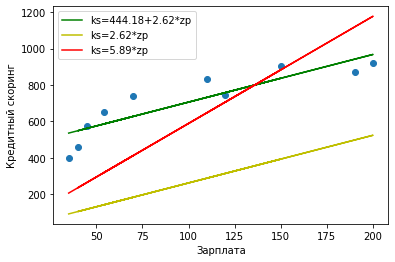

In [6]:
_ks1 = 2.62*zp
_ks2 = 5.89*zp
plt.scatter(zp,ks)
plt.plot(zp, _ks, c='g', label='ks=444.18+2.62*zp')
plt.plot(zp, _ks1, c='y', label='ks=2.62*zp')
plt.plot(zp, _ks2, c='r', label='ks=5.89*zp')
plt.legend()
plt.xlabel('Зарплата')
plt.ylabel('Кредитный скоринг', rotation=90)
plt.show()

In [7]:
ks1=ks.reshape((-1,1))
ks

array([401, 574, 874, 919, 459, 739, 653, 902, 746, 832])

In [8]:
zp1=zp.reshape((-1,1))
zp

array([ 35,  45, 190, 200,  40,  70,  54, 150, 120, 110])

In [9]:
B1=np.dot(np.linalg.inv(np.dot(zp1.T,zp1)),np.dot(zp1.T,ks1))
B1

array([[5.88982042]])

In [10]:
ks=ks.reshape((-1,1))
ks

array([[401],
       [574],
       [874],
       [919],
       [459],
       [739],
       [653],
       [902],
       [746],
       [832]])

In [11]:
zp=zp.reshape((-1,1))
zp=np.hstack([np.ones((len(zp),1)),zp])
zp

array([[  1.,  35.],
       [  1.,  45.],
       [  1., 190.],
       [  1., 200.],
       [  1.,  40.],
       [  1.,  70.],
       [  1.,  54.],
       [  1., 150.],
       [  1., 120.],
       [  1., 110.]])

In [12]:
B=np.dot(np.linalg.inv(np.dot(zp.T,zp)),np.dot(zp.T,ks))
B

array([[444.17735732],
       [  2.62053888]])

#### 2.Посчитать коэффициент линейной регрессии при заработной плате (zp), используя градиентный спуск (без intercept).

In [39]:
zp = np.array([35, 45, 190, 200, 40, 70, 54, 150, 120, 110])
ks = np.array([401, 574, 874, 919, 459, 739, 653, 902, 746, 832])

In [40]:
def _mse(b, x, y):
    return np.sum((b*x-y)**2)/len(x)

In [41]:
def _mse_p(b, x, y):
    return (2/len(x))*np.sum((b*x-y)*x)

In [42]:
alpha=1e-06
b=0.1
for i in range(501):
    b-=alpha*2/len(x)*np.sum((b*x-y)*x)
    if i%50==0: print(f'Итерация № {i}, b = {b}, mse = {_mse(b, zp, ks)}')

Итерация № 0, b = 0.25952808, mse = 493237.7212546963
Итерация № 50, b = 4.497229618367758, mse = 83233.94472982832
Итерация № 100, b = 5.54537842245223, mse = 58151.31823171113
Итерация № 150, b = 5.804626485478126, mse = 56616.849068093856
Итерация № 200, b = 5.868748638669329, mse = 56522.97550129376
Итерация № 250, b = 5.884608547059329, mse = 56517.232638059555
Итерация № 300, b = 5.888531320728348, mse = 56516.88130936019
Итерация № 350, b = 5.889501575592372, mse = 56516.85981627392
Итерация № 400, b = 5.8897415574471985, mse = 56516.85850140053
Итерация № 450, b = 5.889800914315978, mse = 56516.858420961085
Итерация № 500, b = 5.889815595583751, mse = 56516.858416040064


#### 3.Произвести вычисления как в пункте 2, но с вычислением intercept. Учесть, что изменение коэффициентов должно производиться на каждом шаге одновременно (то есть изменение одного коэффициента не должно влиять на изменение другого во время одной итерации).

In [45]:
model=LinearRegression()
zp=zp.reshape((-1,1))
regres=model.fit(zp,ks)
print(regres.intercept_, regres.coef_)

444.1773573243595 [2.62053888]


In [50]:
df=pd.DataFrame({'Реальный к.скоринг':ks,'Предсказание':model.predict(zp)})
df

,Реальный к.скоринг,Предсказание
0,401,535.896218
1,574,562.101607
2,874,942.079745
3,919,968.285134
4,459,548.998913
5,739,627.615079
6,653,585.686457
7,902,837.258190
8,746,758.642023
9,832,732.436634
